In [24]:
import pandas as pd

df=pd.read_excel("/content/Classes June 2018 Cleaned and preprocessed data.xlsx")
df1=pd.read_excel("/content/Cleaned and Preprocessed data Classes april-May 2018.xlsx")

In [25]:
# the data is in a time series format, with appropriate date indexing.

df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'])
df1['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df1['BookingEndDateTime (Month / Day / Year)'])

df = df.set_index('BookingEndDateTime (Month / Day / Year)')
df1 = df1.set_index('BookingEndDateTime (Month / Day / Year)')


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Split the data into training and test sets for the second dataframe
train_data1, test_data1 = train_test_split(df1, test_size=0.2, shuffle=False)


In [27]:
# prompt: Select and Train Model

from sklearn.linear_model import LinearRegression

# Train the model on the training data
model = LinearRegression()
model.fit(train_data[['MaxBookees']], train_data['Number Booked'])

# Train the model on the training data for the second dataframe
model1 = LinearRegression()
model1.fit(train_data1[['MaxBookees']], train_data1['Number Booked'])


LinearRegression()

In [28]:
import numpy as np
# Evaluate the model on the test data
predictions = model.predict(test_data[['MaxBookees']])
residual_sum_squares = np.mean((predictions - test_data['Number Booked'])**2)
variance_score = model.score(test_data[['MaxBookees']], test_data['Number Booked'])

# Print the results
print("Residual sum of squares: %.2f" % residual_sum_squares)
print("Variance score: %.2f" % variance_score)

# Evaluate the model on the test data for the second dataframe
predictions1 = model1.predict(test_data1[['MaxBookees']])
residual_sum_squares1 = np.mean((predictions1 - test_data1['Number Booked'])**2)
variance_score1 = model1.score(test_data1[['MaxBookees']], test_data1['Number Booked'])

# Print the results for the second dataframe
print("Residual sum of squares: %.2f" % residual_sum_squares1)
print("Variance score: %.2f" % variance_score1)


Residual sum of squares: 0.61
Variance score: -0.29
Residual sum of squares: 0.63
Variance score: 0.04


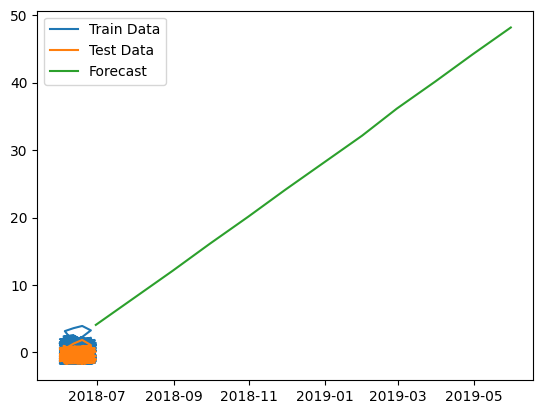

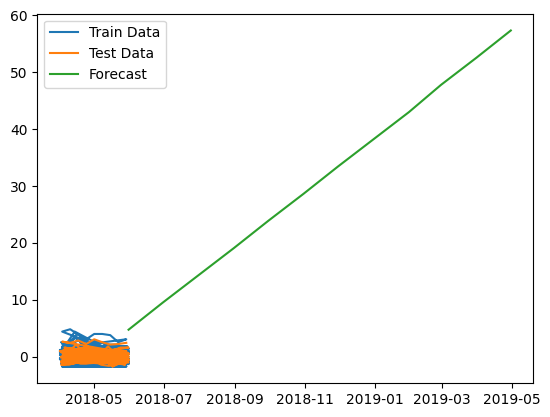

In [29]:
# Generate forecasts for the next 12 months
forecast_dates = pd.date_range(start=test_data.index[-1], periods=12, freq='M')
forecast = model.predict(pd.DataFrame({'MaxBookees': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]}, index=forecast_dates))

# Generate forecasts for the next 12 months for the second dataframe
forecast_dates1 = pd.date_range(start=test_data1.index[-1], periods=12, freq='M')
forecast1 = model1.predict(pd.DataFrame({'MaxBookees': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]}, index=forecast_dates1))

# Plot the forecasts
import matplotlib.pyplot as plt

plt.plot(train_data.index, train_data['Number Booked'], label='Train Data')
plt.plot(test_data.index, test_data['Number Booked'], label='Test Data')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.show()

# Plot the forecasts for the second dataframe
plt.plot(train_data1.index, train_data1['Number Booked'], label='Train Data')
plt.plot(test_data1.index, test_data1['Number Booked'], label='Test Data')
plt.plot(forecast_dates1, forecast1, label='Forecast')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error for the first dataframe
mae = mean_absolute_error(test_data['Number Booked'], predictions)
print("Mean absolute error:", mae)

# Calculate the mean squared error for the first dataframe
mse = mean_squared_error(test_data['Number Booked'], predictions)
print("Mean squared error:", mse)

# Calculate the mean absolute error for the second dataframe
mae1 = mean_absolute_error(test_data1['Number Booked'], predictions1)
print("Mean absolute error:", mae1)

# Calculate the mean squared error for the second dataframe
mse1 = mean_squared_error(test_data1['Number Booked'], predictions1)
print("Mean squared error:", mse1)


Mean absolute error: 0.680001973014795
Mean squared error: 0.614992782158827
Mean absolute error: 0.6575056591612641
Mean squared error: 0.6263367357009946
